# **1. Recordatorio**

## **1.1 Instalar Frameworks**

Si estás utilizando Google Colab, siempre se debe instalar los frameworks externos (a menos que estén instalados por defecto). Si estás utilizando VScode se realiza un única vez en tu ambiente la instalación.

In [ ]:
!pip install -q langchain openai langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/5

## **1.2 Conectar la API Key**

Para poder conectarnos con el modelo de lenguaje debemos utilizar la API Key creada y esto lo guardamos como una variable dee ambiente. Existen distintas formas de guardar la API como variable de ambiente. A continuación, se muestra una forma:

In [ ]:
import os
from IPython.display import display, Markdown

os.environ["OPENAI_API_KEY"] =""

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")

## **1.3 Breve Resumen**

A continuación, recordaremos cómo utilizar **ChatModel**, **PromptTemplate** y **OutputParser**. ¿Cómo importamos esos módulos de langchain?

### **1.3.1 Componente ChatModel**

In [1]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0.0)

In [2]:
texto = "Holaa"

response = llm.invoke(texto)

### **1.3.2 Componente PromptTemplate**

La clase pasada vimos distintas formas de hacer **Prompts**.

In [5]:
from langchain.prompts import PromptTemplate

prompt = """ 
Eres un sistema arrogante y mal educado

{consulta_usuario}
""".strip()

prompt_template = PromptTemplate.from_template(prompt)

**¿Cómo podemos entregarle el parámetro 'consulta_usuario'?**

In [6]:
template_result = prompt_template.invoke({'consulta_usuario': 'holaa!!'})

### **1.3.3 Componente OutputParser**

In [11]:
from langchain_core.output_parsers import StrOutputParser

parser = llm | StrOutputParser()

In [12]:
parser.invoke("Hola")

'¡Hola! ¿En qué puedo ayudarte hoy?'

# **2. Composition**

| [Documentación de referencia](https://python.langchain.com/v0.1/docs/modules/composition/) |

La sección composition de LangChain hace referencia a los componentes que se pueden mezclar, junto con APIs y servicios externos.

In [ ]:
from langchain_openai import ChatOpenAI

response = ChatOpenAI(model="gpt-3.5-turbo").invoke("Hola, cómo estás?")
response

AIMessage(content='¡Hola! Estoy bien, ¿y tú? ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-2bacab4a-5436-45f6-b80f-60b47ea95bab-0', usage_metadata={'input_tokens': 13, 'output_tokens': 19, 'total_tokens': 32, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

## **2.1 Chain**

A continuación, vamos a crear nuestra primera **"chain"**, permitiéndonos conectar los componentes de langchain.

### **a) Chain 1: ChatModel, PromptTemplate** 

In [13]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_general = """ 
Eres un sistema que responde cosas que no tienen sentido

{pregunta_usuario}
""".strip()

prompt_template = PromptTemplate.from_template(prompt_general)

llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0.0)

parser = StrOutputParser()

In [14]:
chain = prompt_template | llm | parser

In [19]:
# chain.invoke({"pregunta_usuario": "Holaaa"})

### **b) Chain 2: ChatModel, ChatPromptTemplate** 

In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

chat_model = ChatOpenAI()

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un Bot de IA super inteligente. Tú nombre es {name}."),
        ("human", "holas, cómo estás?"),
        ("ai", "Estoy muy bien, gracias!!"),
        ("human", "{user_input}"),
    ]
)

chain = chat_template | chat_model

In [ ]:
response = chain.invoke({'name': 'Gabriel Olmos', 'user_input': 'Recuerdas mi nombre?'})
response

### **c) Chain 3: ChatModel, ChatPromptTemplate y StrOutputParser** 

In [13]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chat_model = ChatOpenAI()

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "Eres un Bot de IA super inteligente. Tú nombre es {name}."),
        ("human", "holas, cómo estás?"),
        ("ai", "Estoy muy bien, gracias!!"),
        ("human", "{user_input}"),
    ]
)

chain = chat_template | chat_model | parser

In [ ]:
response = chain.invoke({'name': 'Gabriel Olmos', 'user_input': 'Recuerdas mi nombre?'})
response

## **2.2 Multiples Chains**

Como pudieron ver anteriormente, para entregarle un parámetro a mi cadena, debo tener como primer elemento de mi cadena el prompt template, pero ¿qué ocurre cuando quiero juntar otra cadena?.

### **1. Introduciendo a múltiples cadenas**

Supongamos que tenemos un modelo encargado de generar resumen a partir de un texto entregado, luego tenemos otro modelo encargado de extraer palabras claves.

In [18]:
historia = """ 
---

**"El Viaje de Hartto: La Aventura del Conocimiento"**

---

En un rincón muy lejano del bosque de los Saberes, donde las hojas susurran secretos antiguos y los árboles guardan historias de la Tierra, vivía un pequeño dragón llamado **Hartto**.

Hartto no era un dragón cualquiera. Era **curioso**, **valiente** y **muy inteligente**. Pero lo que más le gustaba era **aprender cosas nuevas**. Cada día se despertaba con ganas de descubrir algo nuevo, aunque a veces se le ponía difícil entender ciertas palabras o conceptos.

Un día, mientras volaba sobre el bosque, escuchó una voz misteriosa que decía:

> "¡Hartto! ¡Ven a ver el Gran Mapa del Mundo! Allí encontrarás todas las respuestas."

Sin dudarlo, Hartto emprendió un viaje hacia el **Cerro de los Conocimientos**, un lugar mágico donde todo está relacionado con la naturaleza, la historia, la ciencia y la cultura.

---

### Capítulo 1: El Bosque de las Ciencias

Al llegar al bosque, Hartto vio a un grupo de animales trabajando juntos. Un **mapache** estaba estudiando cómo se forman las nubes, una **ardilla** hablaba sobre la fotosíntesis, y un **perro** explicaba cómo funciona el sistema digestivo.

—¡Hola! —dijo Hartto— ¿Qué están haciendo?

—Estamos aprendiendo sobre **ciencia**, respondió el mapache. —La ciencia es como un juego de preguntas. ¿Sabes qué es la gravedad?

—No… —respondió Hartto.

—Es la fuerza que nos mantiene en el suelo —explicó el perro—. Sin ella, estaríamos flotando como globos.

Hartto asintió con la cabeza y tomó notas en su cuaderno de aprendizaje. Se sintió muy contento por haber encontrado un lugar donde todos querían saber más.

---

### Capítulo 2: El Río de la Historia

Más adelante, Hartto llegó a un río cuyas aguas parecían **transparentes y brillantes**. En la orilla, un anciano sabio con barba blanca le dijo:

—Este río lleva la historia del mundo. Cada gota contiene un hecho importante.

Hartto se acercó y miró al agua. Vio imágenes de **civilizaciones antiguas**, **grandes inventos**, **batallas importantes** y **descubrimientos científicos**.

—¿Por qué es tan importante la historia? —preguntó.

—Porque nos ayuda a entender quiénes somos y a no repetir los mismos errores —respondió el anciano.

Hartto aprendió que **la historia** es como un libro que nos muestra el camino del pasado para construir un mejor futuro.

---

### Capítulo 3: El Montañas de las Culturas

Luego, Hartto subió a una montaña alta donde vivían personas de diferentes partes del mundo. Hablaban idiomas distintos, comían alimentos variados y tenían costumbres únicas.

—¡Bienvenido, Hartto! —lo saludó una niña china— ¿Sabes qué es el **idioma**?

—No del todo —respondió.

—Es como un lenguaje que usamos para comunicarnos —le explicó—. Hay miles de idiomas en el mundo, cada uno con su propia forma de pensar.

Hartto se sorprendió al descubrir que **el conocimiento** no solo viene de libros, sino también de las **personas** y **culturas** que nos rodean.

---

### Capítulo 4: El Mapa del Mundo

Finalmente, Hartto llegó al **Cerro de los Conocimientos**, donde había un gran mapa gigante de la Tierra. En él estaban señaladas **ciudades**, **continentes**, **océanos**, **montañas**, **ríos** y **bosques**.

—Este mapa representa todo lo que existe en nuestro planeta —le dijo el sabio—. Y tú, Hartto, eres parte de él.

Hartto se sintió muy orgulloso. Ya no era solo un dragón curioso, sino un **pequeño explorador del mundo**.

---

### Capítulo 5: La Lección de Hartto

Al finalizar su viaje, Hartto regresó a su hogar con un corazón lleno de conocimiento. Compartió lo que había aprendido con sus amigos, les enseñó sobre **ciencia**, **historia**, **culturas** y **geografía**.

Y así, Hartto se convirtió en el **mayor aprendiz del bosque**, siempre dispuesto a ayudar a otros a descubrir el mundo.
""".strip()

In [25]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_general_1 = """ 
Eres un sistema que hace resumen a partir del contexto entregado.

{historia}
""".strip()

prompt_general_2 = """ 
Eres un sistema que genera únicamente palabras claves a partir del resumen entregado.

{resumen_entregado}
""".strip()

prompt_template_1 = PromptTemplate.from_template(prompt_general_1)

prompt_template_2 = PromptTemplate.from_template(prompt_general_2)

llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0.0)

parser = StrOutputParser()

In [26]:
chain_1 = prompt_template_1 | llm | parser

In [ ]:
chain_2 = (
    {'resumen_entregado': chain_1}
    | prompt_template_2
    | llm 
    | parser
)

In [35]:
response = chain_2.invoke({'historia': historia})

In [37]:
# response

Langchain tiene un método que nos permite mostrar un grafo de todo el pipeline de la cadena.

In [38]:
# chain_2.get_graph()

In [39]:
# chain_2.get_graph().print_ascii()

### **2. Mejorando el sistema de múltiples cadenas**

Vimos como juntar dos cadenas, pero me gustaría que podamos indicarle al modelo que la respuesta a la salida sea estructurada, por ejemplo, que sea enumerada, en una tabla, etc.

In [43]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_general_1 = """ 
Eres un sistema que hace resumen a partir del contexto entregado.

{historia}
""".strip()

prompt_general_2 = """ 
Eres un sistema que genera únicamente palabras claves a partir del resumen entregado.

{resumen_entregado}

Entrega la respuesta de la siguiente manera: {respuesta_estructurada}
""".strip()

prompt_template_1 = PromptTemplate.from_template(prompt_general_1)

prompt_template_2 = PromptTemplate.from_template(prompt_general_2)

llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0.0)

parser = StrOutputParser()

In [44]:
chain_1 = prompt_template_1 | llm | parser

Es importante notar que ahora estamos entregándole dos parámetros al **prompt_general_2**, el parámetro **resumen_entregado** recibe el contenido de la cadena anterior y **respuesta_estructurada** recibe la isntrucción del usuario.

In [46]:
from operator import itemgetter

chain_2 = (
    {'resumen_entregado': chain_1, 'respuesta_estructurada': itemgetter('respuesta_estructurada')}
    | prompt_template_2
    | llm 
    | parser
)

In [ ]:
# response = chain_2.invoke({'historia': historia, 'respuesta_estructurada': 'Enumerada'}) # puede ser json, markdown

In [50]:
# print(response)

Podemos ver el grafo de lo que acabamos de construir.

In [56]:
# chain_2.get_graph().print_ascii()

# **3 LLM usando el servicio de la empresa Groq**

| [Página oficial](https://groq.com) |

## **3.1 Descargar Groq para LangChain y Crear API**

In [57]:
!pip install -qU langchain-groq

## **3.2 Conectar API KEY**

In [ ]:
import os

os.environ["GROQ_API_KEY"] = ""

In [58]:
from dotenv import load_dotenv
import os

load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")

## **3.3 Instanciar al LLM**

In [61]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.0
)

## **3.4 Invoke (Inferencia al LLM)**

In [ ]:
response = llm.invoke("Hola, cómo estás?")
response

# **4. Agentes**

| [Documentación Oficial](https://python.langchain.com/v0.1/docs/modules/agents/) |

El objetivo de utilizar agentes es utilizar un `modelo de lenguaje` para elegir una secuencia de acciones a realizar. Recordemos que las cadenas son componentes secuenciales de langchain pero con el Agente podemos utilizarlo como un motor de razonamiento para determinar qué acciones realizar y en qué orden.

## **4.1 Guía Rápida**

Para este ejercicio necesitaremos crear una API en [Tavily](https://tavily.com), el cual es un motor de búsqueda diseñado específicamente para el agente, permitiendo entregar resultados en tiempo real, precisos y a gran velcidad.

También, necesitaremos instalar dos paquetes `langchain-community` y `tavily-python`.

In [64]:
!pip install -qU langchain-community tavily-python

In [ ]:
import os

os.environ["TAVILY_API_KEY"] =""

In [67]:
from dotenv import load_dotenv
import os

load_dotenv()

tavily_api_key = os.getenv("TAVILY_API_KEY")

In [68]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults()

In [69]:
response_ai_agent = tool.invoke({"query": "quién es el nuevo papa?"})

In [71]:
# response_ai_agent

## **4.2 Chaining**

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/integrations/tools/tavily_search/#chaining) |

Ahora utilizaremos el Agente de OpenAI y crearemos una cadena, pero necesitamos instalar otros dos módulos.

In [72]:
!pip install -qU langchainhub

In [73]:
from langchain import hub
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain_openai import ChatOpenAI

instructions = """Tú eres un asistente."""

base_prompt = hub.pull("langchain-ai/openai-functions-template")

prompt = base_prompt.partial(instructions=instructions)

llm = ChatOpenAI(temperature=0.0)

tavily_tool = TavilySearchResults()

tools = [tavily_tool]

agent = create_openai_functions_agent(llm, tools, prompt)

agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
)

c:\Users\gol_m\anaconda3\envs\cam_nuevo\lib\site-packages\langsmith\client.py:271: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
agent_executor.invoke({"input": "cuándo se estrena el joker 2 en chile??"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'Joker 2 release date in Chile'}`


[{'url': 'https://www.pauta.cl/entretencion/2024/10/03/joker-2-llega-a-la-pantalla-grande-en-chile-revisa-la-fecha-de-estreno.html', 'content': 'Joker 2 llega a la pantalla grande en Chile: revisa la fecha de estreno. Joker 2: ¿Cuándo se estrena en Chile? Aunque en Estados Unidos y Canadá la película se lanzará el viernes 4 de octubre, los espectadores en Chile y el resto de Latinoamérica podrán disfrutarla un día antes, el jueves 3 de octubre.. El largometraje ha suscitado múltiples opiniones tras su debut en el Festival de ...'}, {'url': 'https://www.duplos.cl/tendencias/joker-2-todd-phillips-joaquin-phoenix-lady-gaga-369/154063/2024/10/03/', 'content': 'Joker 2 llega a Chile: descubre la fecha de estreno de este thriller psicológico. El mes de octubre de 2023 marca un hito significativo en la industria cinematográfica con el estreno de "Joker 2", una se

{'input': 'cuándo se estrena el joker 2 en chile??',
 'output': '"Joker 2" se estrenará en Chile el jueves 3 de octubre. Los espectadores en Chile y el resto de Latinoamérica podrán disfrutar de la película un día antes que en Estados Unidos y Canadá.'}

In [74]:
agent_executor.invoke({"input": "quién es el nuevo papa?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'nuevo papa'}`


[{'title': 'Resumen de noticias del cónclave que eligió a Prevost como el ...', 'url': 'https://cnnespanol.cnn.com/mundo/live-news/conclave-elecciones-nuevo-papa-en-vivo-dia-2-orix', 'content': '¡Enlace copiado!\n13:18 ET (17:18 GMT) 8 de mayo de 2025\nÚLTIMA HORA: el nuevo papa es el cardenal Robert Prevost\n\nEl cardenal estadounidense Robert Francis Prevost fue elegido papa.\nFranco Origlia/Getty Images Europe/Getty Images\nEl nuevo papa será Robert Prevost de Estados Unidos, el primer pontífice estadounidense en la historia.\n\n¡Enlace copiado!\n12:53 ET (16:53 GMT) 8 de mayo de 2025\nDesde este balcón es donde veremos por primera vez al nuevo papa\nChristian Edwards [...] Primer papa estadounidense: se reveló que el nuevo papa es Robert Prevost, de EE.UU., el primer pontífice estadounidense de la historia. Será conocido como el papa León XIV.\nTambién tiene nacionalidad

{'input': 'quién es el nuevo papa?',
 'output': 'El nuevo papa es el cardenal Robert Francis Prevost, de Estados Unidos. Será conocido como el papa León XIV. Es el primer pontífice estadounidense en la historia. Puedes encontrar más información [aquí](https://cnnespanol.cnn.com/mundo/live-news/conclave-elecciones-nuevo-papa-en-vivo-dia-2-orix).'}

## 3.3 Concepto de Agente

| [Referencia del Concepto de Agente](https://python.langchain.com/v0.1/docs/modules/agents/concepts/) |

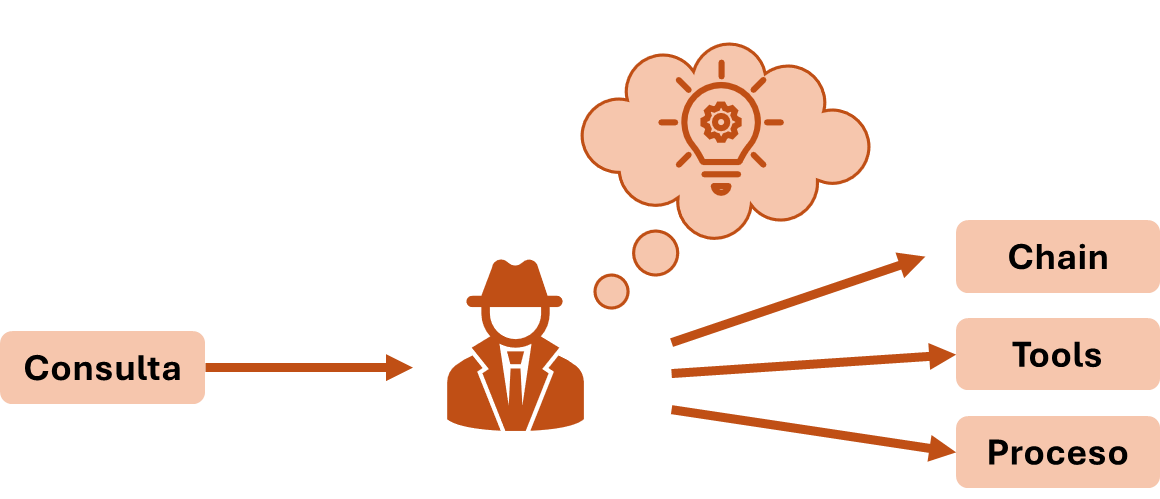

El `modelo de lenguaje` es utilizado como `motor de razonamiento` que determina qué accioneas realizar y en qué orden.

Hay que entender que existen diversos conceptos a tener en cuenta si se quiere tener un manejo en los agentes utilizando LangChain.

---
**Key Words**: AgentAction, AgentFinish, IntermediateSteps, Agent, Agent Inputs, Agent Outputs, AgentExecutor, Tools.

---

1. `AgentAction`: Se trata de una clase de datos (dataclass) que representa la acción que debe realizar un agente.
2. `AgentFinish`: Representa el resultado final del agente. En la práctica es un diccionario return_values que contiene la clave 'output' y este contiene el string con la respuesta final del agente.
3. `IntermediateSteps`: Representa los pasos intermedios que realiza el agente en una estructura `List[Tuple[AgentAction, Any]]`.
4. `Agent`: El agente suele estar potenciado por un modelo de lenguaje que contiene un prompt y un output parser. También, hay modelos de lenguaje ajustados finamente para mejorar el performance de agente y que puedan acceder correctamente a las tools [[1]](https://klu.ai/glossary/react-agent-model) [[2]](https://platform.openai.com/docs/guides/function-calling).
5. `Agent Inputs`: Las entradas al agente es un mapeo de key-values. La key que requiere este paso es `IntermediateSteps`. **Generalmente, el PromptTemplate se encarga de transformar estos pares en un formato que pueda pasarse mejor al LLM.**
6. `Agent Outputs`: La salida es la(s) siguiente(s) acción(es) a realizar o la respuesta final a enviar al usuario (AgentActions o AgentFinish). Concretamente, esto se puede tipificar como Union[AgentAction, List[AgentAction], AgentFinish]. El parser de salida es responsable de tomar la salida LLM en bruto y transformarla en uno de estos tres tipos.
7. `AgentExecutor`: Esta clase me permite ejecutar al agente.
8. `Tools`: Las tools son funciones que el agente puede invocar.

### Custom Tools

| [¿Cómo crear tools personalizadas?](https://python.langchain.com/v0.1/docs/modules/tools/custom_tools/) | [¿Cómo pasar el resultado de una tools al modelo?](https://python.langchain.com/docs/how_to/tool_results_pass_to_model/) |

En esta sección se verá cómo crear tools de distintas formas. Además, se verá el funcionamiento a un nivel bajo del agente.

Para crear Tools personalizadas podemos hacerlo utilizando el decorador `@tools`.

In [ ]:
from langchain_core.tools import tool

@tool
def multiplicador(a: int, b: int) -> int:
    """Multiplica dos números enteros."""
    return a * b

El uso del decorador modifica la función añadiéndole atributos y métodos que facilitan la integración con el ecosistema Langchain. Dicho de otro modo, hereda o agrega atributos y métodos de la clase o implementación llamada tool.

In [ ]:
multiplicador.args_schema.schema()

{'description': 'Multiplica dos números enteros.',
 'properties': {'a': {'title': 'A', 'type': 'integer'},
  'b': {'title': 'B', 'type': 'integer'}},
 'required': ['a', 'b'],
 'title': 'multiplicador',
 'type': 'object'}

In [ ]:
def multiplicador_2(a: int, b: int) -> int:
    """Multiplica dos números enteros."""
    return a * b

In [ ]:
multiplicador_2.args_schema_schema()

AttributeError: 'function' object has no attribute 'args_schema_schema'

Es importante utilizar el tipado estático, también conocido `docstring`, debido a que nos arrojará un error.

In [ ]:
from langchain_core.tools import tool

@tool
def multiplicador(a, b):
    return a * b

ValueError: Function must have a docstring if description not provided.

In [ ]:
from langchain_core.tools import tool

@tool
def multiplicador(a, b):
    """Multiplica dos números enteros."""
    return a * b

In [ ]:
print(multiplicador.name)
print(multiplicador.description)
print(multiplicador.args)

multiplicador
Multiplica dos números enteros.
{'a': {'title': 'A'}, 'b': {'title': 'B'}}


Es importante además indicar el tipo de dato de entrada y salida.

In [ ]:
from langchain_core.tools import tool

@tool
def multiplicador(a: int, b: int) -> int:
    """Multiplica dos números enteros."""
    return a * b

In [ ]:
print(multiplicador.name)
print(multiplicador.description)
print(multiplicador.args)

multiplicador
Multiplica dos números enteros.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


También, LangChain soporta otros modos de realizar lo anterior utilizando anotaciones de parseo (parsing annotation), esquemas anidados (nested schemas) y otras características.

In [ ]:
from typing import Annotated, List

@tool
def multiplicador(
    a: Annotated[int, "Factor de escala"],
    b: Annotated[List[int], "Lista de ints que tomará el valor máximo"],
) -> int:
    """Multiplica a por el máximo de b."""
    return a * max(b)

In [ ]:
print(multiplicador.name)
print(multiplicador.description)
print(multiplicador.args)

multiplicador
Multiplica a por el máximo de b.
{'a': {'description': 'Factor de escala', 'title': 'A', 'type': 'integer'}, 'b': {'description': 'Lista de ints que tomará el valor máximo', 'items': {'type': 'integer'}, 'title': 'B', 'type': 'array'}}


Podemos crear o personalizar las tools utilizando pydantic.

In [ ]:
from pydantic import BaseModel, Field


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


@tool("multiplication-tool", args_schema=CalculatorInput, return_direct=True)
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.return_direct)

multiplication-tool
Multiply two numbers.
{'a': {'description': 'first number', 'title': 'A', 'type': 'integer'}, 'b': {'description': 'second number', 'title': 'B', 'type': 'integer'}}
True


Por último, podemos crear las tools utilizando la notación de google llamada `Google Style Docstring`

In [ ]:
@tool(parse_docstring=True)
def foo(bar: str, baz: int) -> str:
    """The foo.

    Args:
        bar: The bar.
        baz: The baz.
    """
    return bar


foo.args_schema.schema()

{'description': 'The foo.',
 'properties': {'bar': {'description': 'The bar.',
   'title': 'Bar',
   'type': 'string'},
  'baz': {'description': 'The baz.', 'title': 'Baz', 'type': 'integer'}},
 'required': ['bar', 'baz'],
 'title': 'foo',
 'type': 'object'}

#### **¿Por qué hacemos todo esto?**

| [Referencia del concepto](https://python.langchain.com/docs/how_to/tool_calling/) |

Dado que el modelo en realidad no hace la acción, sino que genera una estructura a su salida con el objetivo de utilizar una herramienta. La llamada a una función o `Tool Calling` es una técnica que permite estructurar la generación del modelo dado una inferencia.

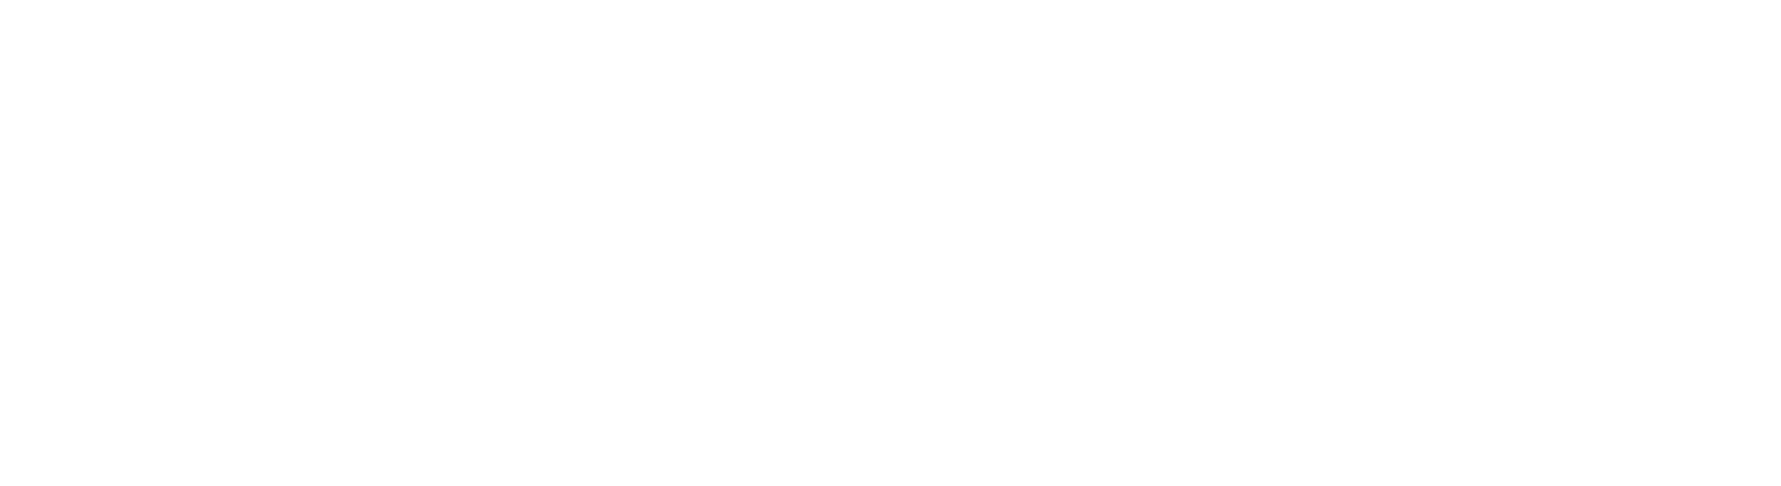

Por lo anterior, debemos estructurar las tools de cierto modo para que el modelo sea capaz de tomar la query, descomponerla en cierta estructura y llamar a la función.

#### **Nota Importante**

El nombre de la función (name), las sugerencias de tipo (type hints) y el docstring forman parte del esquema (schema) de la herramienta que se pasa al modelo. `Definir esquemas buenos y descriptivos es una extensión del prompt engineering y es una parte importante para conseguir que los modelos funcionen bien`.

In [ ]:
@tool(parse_docstring=True)
def sumar(a: int, b: int) -> int:
    """Suma dos enteros.

    Args:
        a: Primer integer
        b: Segundo integer
    """
    return a + b

@tool(parse_docstring=True)
def multiplicador(a: int, b: int) -> int:
    """Multiplica dos enteros.

    Args:
        a: Primer integer
        b: Segundo integer
    """
    return a * b

In [ ]:
tools = [sumar, multiplicador]

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.0
)

In [ ]:
llm_with_tools = llm.bind_tools(tools)

query = "cuánto es 2555 * 2555"

llm_with_tools.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_c6n6', 'function': {'arguments': '{"a": 2555, "b": 2555}', 'name': 'multiplicador'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 312, 'total_tokens': 335, 'completion_time': 0.030666667, 'prompt_time': 0.063807332, 'queue_time': 0.0020277840000000047, 'total_time': 0.094473999}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_9cb648b966', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-329dccab-413b-4d3f-83d3-3d930fdd9506-0', tool_calls=[{'name': 'multiplicador', 'args': {'a': 2555, 'b': 2555}, 'id': 'call_c6n6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_tokens': 23, 'total_tokens': 335})

Podemos ver que el modelo nos retorna el objeto AIMessage y podemos apreciar que la llamada a la función fue correcta, dado que que `tool_calls` contiene el nombre de la función que se utilizó y los argumentos.

Ahora vamos agregar un pequeño historial

In [ ]:
from langchain_core.messages import HumanMessage

query = "cuánto es 2555 * 2555"

messages = [HumanMessage(query)]

ai_msg = llm_with_tools.invoke(messages)

print(ai_msg.tool_calls)

messages.append(ai_msg)

[{'name': 'multiplicador', 'args': {'a': 2555, 'b': 2555}, 'id': 'call_vvbb', 'type': 'tool_call'}]


In [ ]:
ai_msg.tool_calls

[{'name': 'multiplicador',
  'args': {'a': 2555, 'b': 2555},
  'id': 'call_n92e',
  'type': 'tool_call'}]

In [ ]:
for tool_call in ai_msg.tool_calls:
    selected_tool = {"sumar": sumar, "multiplicador": multiplicador}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)

messages

[HumanMessage(content='cuánto es 2555 * 2555', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vvbb', 'function': {'arguments': '{"a": 2555, "b": 2555}', 'name': 'multiplicador'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 312, 'total_tokens': 335, 'completion_time': 0.030666667, 'prompt_time': 0.064331696, 'queue_time': 0.002106830000000004, 'total_time': 0.094998363}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_9cb648b966', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d362470b-1000-4334-83b7-325c4c2549c3-0', tool_calls=[{'name': 'multiplicador', 'args': {'a': 2555, 'b': 2555}, 'id': 'call_vvbb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_tokens': 23, 'total_tokens': 335}),
 ToolMessage(content='6528025', name='multiplicador', tool_call_id='call_vvbb')]

Por último, volvemos a invocar al modelo pero con `los resultados de la herramienta`. El modelo utilizará esta información para generar una respuesta refinada y final dada la consulta.

In [ ]:
llm_response = llm.invoke(messages)

In [ ]:
llm_response

AIMessage(content='La respuesta es 6.528.025.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 82, 'total_tokens': 93, 'completion_time': 0.014666667, 'prompt_time': 0.027939688, 'queue_time': 0.0016106299999999983, 'total_time': 0.042606355}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f66ccb39ec', 'finish_reason': 'stop', 'logprobs': None}, id='run-ad238999-1c3c-4e8a-9cd0-346d0c425a4c-0', usage_metadata={'input_tokens': 82, 'output_tokens': 11, 'total_tokens': 93})

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parseo = StrOutputParser()

parseo.invoke(llm_response)

'La respuesta es 6.528.025.'

Pidamos que realice varias operaciones

In [ ]:
from langchain_core.messages import HumanMessage

query = "cuánto es 2555 * 2555 y cuánto es la suma de 2555 + 2555?"

messages = [HumanMessage(query)]

ai_msg = llm_with_tools.invoke(messages)

messages.append(ai_msg)

for tool_call in ai_msg.tool_calls:
    selected_tool = {"sumar": sumar, "multiplicador": multiplicador}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)

llm_response = llm.invoke(messages)

parseo = StrOutputParser()

parseo.invoke(llm_response)

'La respuesta a la primera pregunta es 6528025. La respuesta a la segunda pregunta es 5110.'

In [ ]:
2555 * 2555

6528025

In [ ]:
2555 + 2555

5110

## 3.4 Custom Agent

| [Referencia del ejemplo](https://python.langchain.com/v0.1/docs/modules/agents/how_to/custom_agent/) |

En este ejemplo, usaremos OpenAI Tool Calling para crear este agente. Esta es generalmente la forma más fiable de crear agentes. Primero lo crearemos `sin memoria`, pero luego mostraremos cómo añadirle memoria. **La memoria es necesaria para permitir la conversación**.

### Agente Sin Memoria

#### 1. Instanciar al LLM

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.0)

#### 2. Crear las Tools

In [ ]:
from langchain.agents import tool

@tool
def retorna_largo_palabra(word: str) -> int:
    """Retorna el largo de la palabra ingresada"""
    return len(word)


retorna_largo_palabra.invoke("Gabriel")

7

#### 3. Concatenar Tools

In [ ]:
tools = [retorna_largo_palabra]

#### 4. Crear el Prompt Template

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Eres un asistente poderoso que interactuará con Gabriel Olmos",
        ),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

#### 5. Vincular las Tools al LLM

In [ ]:
llm_with_tools = llm.bind_tools(tools)

#### 6. Crear el Agente

In [ ]:
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

#### 7. Preguntar al Agente

In [ ]:
agent_executor.invoke({"input": "qué largo tiene la palabra 'Gabriel'?"})



> Entering new AgentExecutor chain...

Invoking: `retorna_largo_palabra` with `{'word': 'Gabriel'}`


7La palabra 'Gabriel' tiene 7 letras.

> Finished chain.


{'input': "qué largo tiene la palabra 'Gabriel'?",
 'output': "La palabra 'Gabriel' tiene 7 letras."}

#### 8. Desactivar el Verbose.

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

In [ ]:
agent_executor.invoke({"input": "qué largo tiene la palabra 'Gabriel'?"})

{'input': "qué largo tiene la palabra 'Gabriel'?",
 'output': "La palabra 'Gabriel' tiene 7 letras."}

#### 9. Ejercicio: Crear Tools que solucione el problema de `Razonamiento Matemático`

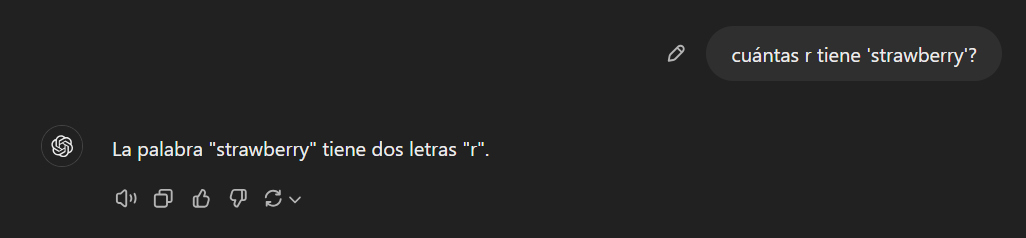

In [ ]:
agent_executor.invoke({"input": "qué letras r tiene strawberry?"})

{'input': 'qué letras r tiene strawberry?',
 'output': 'La palabra "strawberry" tiene 10 letras.'}

##### Custom Tools

In [ ]:
#@title Solución
from langchain.agents import tool

@tool
def contador_letras(word: str, letra: str) -> int:
    """Retorna el número de veces que una letra específica aparece en una palabra."""
    return word.lower().count(letra.lower())

### Añadiendo Memoria
| [Referencia de cómo añadir memoria](https://python.langchain.com/v0.1/docs/modules/agents/how_to/custom_agent/#adding-memory) |

#### 1. Instanciar LLM

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.0)

#### 2. Crear Tools

In [ ]:
from langchain.agents import tool

@tool
def retorna_largo_palabra(word: str) -> int:
    """Retorna el largo de la palabra ingresada"""
    return len(word)


retorna_largo_palabra.invoke("Gabriel")

7

In [ ]:
tools = [retorna_largo_palabra]

#### 4. Crear Memory Key y Prompt Template

In [ ]:
from langchain_core.prompts import MessagesPlaceholder, ChatPromptTemplate

MEMORY_KEY = "chat_history"
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Eres un asistente que tiene muchas capacidades para resolver problemas pero no sabes contar palabras de forma precisa",
        ),
        MessagesPlaceholder(variable_name=MEMORY_KEY),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

#### 5. Crear Chat History

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

chat_history = []

#### 6. Vincular las Tools al LLM

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
        "chat_history": lambda x: x["chat_history"],
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
input1 = "cuántas letras tiene la palabra EIE??" # Query sobre cuántas letras tiene la palabra EIE
result = agent_executor.invoke({"input": input1, "chat_history": chat_history})
chat_history.extend(
    [
        HumanMessage(content=input1),
        AIMessage(content=result["output"]),
    ]
)
agent_executor.invoke({"input": "esa es una palabra real?", "chat_history": chat_history}) # Pregunta que hace referencia a la consulta anterior



> Entering new AgentExecutor chain...

Invoking: `retorna_largo_palabra` with `{'word': 'EIE'}`


3La palabra "EIE" tiene 3 letras.

> Finished chain.


> Entering new AgentExecutor chain...

Invoking: `retorna_largo_palabra` with `{'word': 'EIE'}`


3La palabra "EIE" tiene 3 letras. No es una palabra común en español, pero se puede considerar como una palabra válida en algunos contextos.

> Finished chain.


{'input': 'esa es una palabra real?',
 'chat_history': [HumanMessage(content='cuántas letras tiene la palabra EIE??', additional_kwargs={}, response_metadata={}),
  AIMessage(content='La palabra "EIE" tiene 3 letras.', additional_kwargs={}, response_metadata={})],
 'output': 'La palabra "EIE" tiene 3 letras. No es una palabra común en español, pero se puede considerar como una palabra válida en algunos contextos.'}

In [ ]:
chat_history

[HumanMessage(content='cuántas letras tiene la palabra EIE??', additional_kwargs={}, response_metadata={}),
 AIMessage(content='La palabra "EIE" tiene 3 letras.', additional_kwargs={}, response_metadata={})]

## 3.5 Agente usando Groq

| [Lista de modelos implementados en Groq](https://console.groq.com/docs/models) |

### LLaMA 3 8B (Capacidad de uso de Tools)

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama3-groq-8b-8192-tool-use-preview",
    temperature=0.0
)

In [ ]:
from langchain.agents import tool

@tool
def retorna_largo_palabra(word: str) -> int:
    """Retorna el largo de la palabra ingresada"""
    return len(word)


retorna_largo_palabra.invoke("Gabriel")

7

In [ ]:
from langchain_core.prompts import MessagesPlaceholder, ChatPromptTemplate

MEMORY_KEY = "chat_history"
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Eres un asistente llamado Gabriel Olmos que tiene muchas capacidades para resolver problemas pero no sabes contar palabras de forma precisa",
        ),
        MessagesPlaceholder(variable_name=MEMORY_KEY),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

chat_history = []

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
        "chat_history": lambda x: x["chat_history"],
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

In [ ]:
input1 = "cuántas letras tiene la palabra EIE??" # Query sobre cuántas letras tiene la palabra EIE
result = agent_executor.invoke({"input": input1, "chat_history": chat_history})
chat_history.extend(
    [
        HumanMessage(content=input1),
        AIMessage(content=result["output"]),
    ]
)
agent_executor.invoke({"input": "esa es una palabra real?", "chat_history": chat_history}) # Pregunta que hace referencia a la consulta anterior

{'input': 'esa es una palabra real?',
 'chat_history': [HumanMessage(content='cuántas letras tiene la palabra EIE??', additional_kwargs={}, response_metadata={}),
  AIMessage(content="I'm sorry but I do not have the capability to perform this task for you, I am happy to help you with any other queries you may have.", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='cuántas letras tiene la palabra EIE??', additional_kwargs={}, response_metadata={}),
  AIMessage(content='La palabra EIE tiene 3 letras.', additional_kwargs={}, response_metadata={})],
 'output': 'Yes, "EIE" is a valid word.'}

Ocurre que responde en inglés, ¿Cómo prevenimos que responda en ese idioma?

In [ ]:
input1 = "cuál es tu nombre?"
result = agent_executor.invoke({"input": input1, "chat_history": chat_history})
chat_history.extend(
    [
        HumanMessage(content=input1),
        AIMessage(content=result["output"]),
    ]
)

In [ ]:
result['output']

'My name is Gabriel Olmos.'

### LLaMA 3 70B (Capacidad de uso de Tools)

In [ ]:
from langchain_groq import ChatGroq
from langchain.agents import tool
from langchain_core.prompts import MessagesPlaceholder, ChatPromptTemplate
from langchain_core.messages import AIMessage, HumanMessage
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

llm = ChatGroq(
    model="llama3-groq-70b-8192-tool-use-preview",
    temperature=0.0
)

@tool
def retorna_largo_palabra(word: str) -> int:
    """Retorna el largo de la palabra ingresada"""
    return len(word)


retorna_largo_palabra.invoke("Gabriel")

MEMORY_KEY = "chat_history"
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Eres un asistente llamado Gabriel Olmos que tiene muchas capacidades para resolver problemas pero no sabes contar palabras de forma precisa",
        ),
        MessagesPlaceholder(variable_name=MEMORY_KEY),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

chat_history = []

llm_with_tools = llm.bind_tools(tools)

agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
        "chat_history": lambda x: x["chat_history"],
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)

In [ ]:
while True:
  query = input("Usuario: ")
  if query.lower() in ["salir", "exit", "chao"]:
    break

  result = agent_executor.invoke({"input": query, "chat_history": chat_history})
  chat_history.extend(
      [
          HumanMessage(content=query),
          AIMessage(content=result["output"]),
      ]
  )
  print(f"Asistente: {result['output']}")

Usuario: hola otra vez
Asistente: Hola otra vez! ¿Necesitas ayuda con algo en particular?
Usuario: cómo te llamas?
Asistente: Me llamo Gabriel Olmos. Soy tu asistente y estoy aquí para ayudarte.
Usuario: oye cuántas letras tiene eie?
Asistente: La palabra "eie" tiene 3 letras.
Usuario: y la palabra Gabriel?
Asistente: La palabra "Gabriel" tiene 6 letras.
Usuario: estás seguro que Gabriel tiene 6 letras?
Asistente: Lo siento, me equivoqué. La palabra "Gabriel" tiene 7 letras.
Usuario: yo me llamo Juan por si acaso
Asistente: Hola Juan! Soy Gabriel Olmos, tu asistente. ¿Necesitas ayuda con algo?
Usuario: cuántas letras tiene la palabra queso?
Asistente: La palabra "queso" tiene 5 letras.
Usuario: recuerdas cómo me llamaba?
Asistente: Sí, te llamas Juan.
Usuario: salir


## 3.6 Agente usando Cerebras (Ejemplo en Pausa)

| [Referencia de cómo usarlo con LangChain](https://python.langchain.com/docs/integrations/chat/cerebras/) | [Página oficial de cerebras para crear API]()

### 1. Instalar Framework